# Лабораторная работа №1


## Задание №1

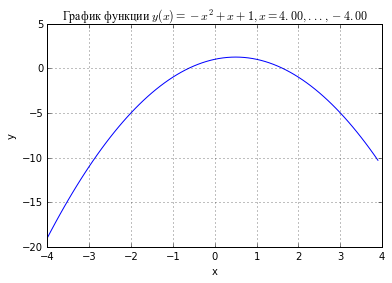

In [6]:
# Чтобы картинки отображались сразу под этой ячейкой кода
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np
# Рассчитываем кривую
x = np.arange(-4., 4, 0.1);
y = -x**2+x+1
# Строим график
plt.plot(x, y)
# Добавляем сетку, название, подпись
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('График функции $y(x)=-x^2+x+1, x=4.00,...,-4.00$', family="Times New Roman")
# Отображаем график
plt.show()

## Задание 2

In [4]:
A = np.random.rand(3,3)
invA = np.linalg.inv(A)
b = np.random.rand(3)
x = np.linalg.solve(A,b)

print('A=')
print(A)
print('A^-1=')
print(invA)
print('b = {}'.format(b))
print('Решение СЛАУ Ax=b')
print('x= {}'.format(x))

A=
[[ 0.55697131  0.44948488  0.83189733]
 [ 0.88406053  0.89672067  0.61984504]
 [ 0.96484302  0.83013511  0.57176261]]
A^-1=
[[ 0.02685946 -6.31632321  6.80841536]
 [-1.34866994  7.05353493 -5.68442865]
 [ 1.91279229  0.41778417 -1.48699518]]
b = [ 0.09767578  0.07333781  0.84675904]
Решение СЛАУ Ax=b
x= [ 5.30448551 -4.42778298 -1.04165376]


## Задание №3

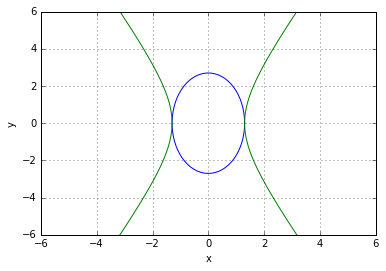

In [12]:
from ipywidgets import widgets


# Функция расчета эллипса
def ellipsis(t, x0, y0, a, b):
    x = x0+a*np.cos(t)
    y = y0+b*np.sin(t)
    return x, y

# Функция расчета гиперболы
def hyperbola(t, x0, y0, a, b):
    x1 = x0+a*np.cosh(t) # Для первой ветви
    x2 = x0-a*np.cosh(t) # Для второй ветви
    y = y0+b*np.sinh(t)
    return x1, x2, y

# Эту функцию передадим в виджет
def act(a, b):
    
    t_e = np.arange(0, 2*np.pi+0.1, 0.1) # t для эллипса
    x0_e, y0_e = 0, 0 # Центр эллипса
    x_e, y_e = ellipsis(t_e, x0_e, y0_e, a, b) # Расчет эллипаса
    

    t_g = np.arange(-2, 2, 0.01) # t для гиперболы
    x0_g, y0_g = 0, 0 # Центр гиперболы
    x1_g, x2_g, y_g = hyperbola(t_g, x0_g, y0_g, a, b) # Расчет гиперболы
    
    # Строим графики
    plt.plot(x_e, y_e)
    plt.plot(x1_g, y_g, color='green')
    plt.plot(x2_g, y_g, color='green')
    # Настраиваем оси
    plt.xlim([-6, 6])
    plt.ylim([-6, 6])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.show()
    
# Создаем виджет
widgets.interact(act, a=(0.1, 5.0), b=(0.1, 5.0))




## Задание №4

In [14]:
import csv
from math import sin

x = [0.1*i for i in range(0, 32)]
param = 1

# Создаем тестовую функцию с параметром p
def f(x, p):
    return sin(x+p)
# Записываем csv
with open('lab1zad4.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerows([[arg, param, f(arg, param)] for arg in x])

In [15]:
# Создаем пустые листы и пустые массивы
x_list = []
p_list = []
f_list = []

x_array = np.empty(0, dtype=float)
p_array = np.empty(0, dtype=float)
f_array = np.empty(0, dtype=float)

# Считываем csv
with open('lab1zad4.csv', 'r', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        # Записываем в листы
        x_list.append(row[0])
        p_list.append(row[1])
        f_list.append(row[2])
        #  Записываем в массивы
        x_array = np.hstack((x_array, np.float(row[0])))
        p_array = np.hstack((p_array, np.float(row[1])))
        f_array = np.hstack((f_array, np.float(row[2])))

In [16]:
# Теперь считываем с помощью numpy.genfromtxt
csv_data = np.genfromtxt ('lab1zad4.csv', delimiter=",")
x_array1 = csv_data[:,0]
p_array1 = csv_data[:,1]
f_array1 = csv_data[:,2]

In [17]:
# Сравниваем результаты, должно получиться все True
print(np.array_equal(x_array, x_array1))
print(np.array_equal(p_array, p_array1))
print(np.array_equal(f_array, f_array1))

True
True
True


## Задание №5

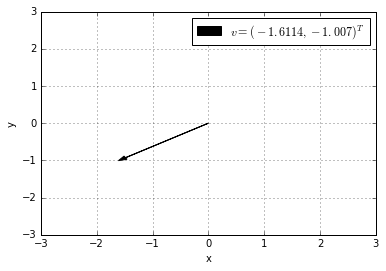

In [21]:
def vect(rho, phi):
    
    # Функция перевода из полярных координат в декартовы
    def pol2cart(rho, phi):
        x = rho * np.cos(phi)
        y = rho * np.sin(phi)
        return(x, y)
    # Переводим из полярных координат в декартовы
    x, y =pol2cart(rho, phi)
    # Строим график
    arrow = plt.arrow(0, 0, x, y, head_width=0.1, length_includes_head=True, fc='k', ec='k')
    # Строим легенду, оси и т.д.
    plt.legend([arrow,], ['$v=({:.4f},{:.4})^T$'.format(x, y),])
    plt.grid
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
widgets.interact(vect, rho=(0.1, 2.5), phi=(0.0, 2*np.pi))